In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
my_data_dir = r"C:\Users\dell\Documents\Perso\Deep_Learning_TF_2_Notebooks_et_Datasets\04-CNNs\cell_images\cell_images"

In [3]:
os.listdir(my_data_dir) 

['test', 'train']

In [4]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [5]:
test_path

'C:\\Users\\dell\\Documents\\Perso\\Deep_Learning_TF_2_Notebooks_et_Datasets\\04-CNNs\\cell_images\\cell_images/test/'

In [6]:
os.listdir(test_path)


['parasitized', 'uninfected']

In [7]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [8]:
os.listdir(train_path+'parasitized')

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


In [9]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [10]:
para_cell = train_path+'/parasitized'+'/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
para_img = imread(para_cell)

In [12]:
para_img.shape

(148, 142, 3)

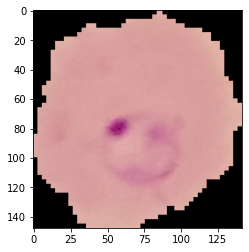

In [13]:
plt.imshow(para_img);

In [14]:
uninfected_cell_path = train_path+'uninfected/'+os.listdir(train_path+'/uninfected')[0]
uninfected_cell = imread(uninfected_cell_path)
plt.imshow(unifected_cell);

NameError: name 'unifected_cell' is not defined

#Nombre de cellules infectées et non infectées

In [15]:
len(os.listdir(train_path+'/uninfected/'))

12480

In [16]:
len(os.listdir(train_path+'/parasitized/'))

12480

In [17]:
len(os.listdir(test_path+'/uninfected/'))

1300

In [18]:
len(os.listdir(test_path+'/parasitized/'))

1300

#les dimensions moyennes des images:
les dimensions n'étant pas de meme taille implique le RNC ne sera pas capable d'entrainer le modèle

In [19]:
#Redimensionner les images pour avoir la meme taille

In [20]:
dim1=[]
dim2=[]
for image_filename in os.listdir(test_path+'/uninfected/'):
    img=imread(test_path+'/uninfected/'+ '/' + image_filename)
    L, H, Color_chanel = img.shape
    dim1.append(L)
    dim2.append(H)
    

C:\Users\dell\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


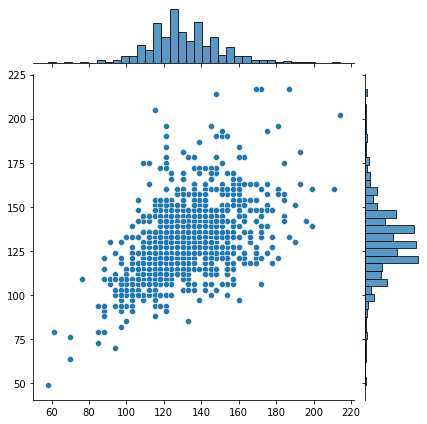

In [21]:
sns.jointplot(dim1, dim2)

In [22]:
np.mean(dim1)

130.92538461538462

In [23]:
np.mean(dim2)

130.75

#fixer la dimension finale des images qui alimenterons le RNC 

In [24]:
image_shape=(130,130,3)    #dimension de toutes les immages

#trop de données qu'il est difficile de lire une seule fois, nombre de point de données L x H x Colors_channel: utiliser le datagenerator pour selectionner par batch (lot) d'image

In [25]:
130*130*3

50700

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [28]:
image_gen=ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [29]:
para_cell=imread(para_cell)

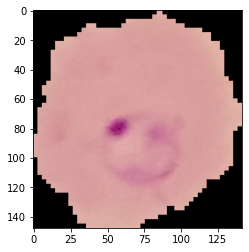

In [30]:
plt.imshow(para_cell)

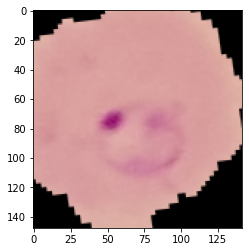

In [31]:
plt.imshow(image_gen.random_transform(para_img))

In [32]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [33]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


<h1>Création du modèle </h1>

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [35]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop=EarlyStopping(monitor='val_cross', patience=2)

In [39]:
batch_size=16

In [40]:
train_image_gen=image_gen.flow_from_directory(train_path, target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 24958 images belonging to 2 classes.


In [41]:
test_image_gen=train_image_gen=image_gen.flow_from_directory(test_path, target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary',
                                             shuffle=False)

Found 2600 images belonging to 2 classes.


In [42]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [43]:
results=model.fit(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/20
163/163 [==============================] - 53s 325ms/step - loss: 7.7360 - accuracy: 0.4808 - val_loss: 0.6921 - val_accuracy: 0.5354
Epoch 2/20
163/163 [==============================] - 56s 341ms/step - loss: 0.7119 - accuracy: 0.5004 - val_loss: 0.6924 - val_accuracy: 0.5138
Epoch 3/20
163/163 [==============================] - 55s 339ms/step - loss: 0.6972 - accuracy: 0.5142 - val_loss: 0.6913 - val_accuracy: 0.5373
Epoch 4/20
163/163 [==============================] - 55s 338ms/step - loss: 1.6284 - accuracy: 0.5319 - val_loss: 0.6953 - val_accuracy: 0.4996
Epoch 5/20
163/163 [==============================] - 55s 337ms/step - loss: 0.6963 - accuracy: 0.5304 - val_loss: 0.6918 - val_accuracy: 0.5265
Epoch 6/20
163/163 [==============================] - 186s 1s/step - loss: 0.6974 - accuracy: 0.5088 - val_loss: 0.6913 - val_accuracy: 0.5250
Epoch 7/20
163/163 [==============================] - 56s 345ms/step - loss: 0.6952 - accuracy: 0.4946 - val_loss: 0.6898 - val_accu

In [44]:
losses=pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,7.736039,0.480769,0.692120,0.535385
1,0.711883,0.500385,0.692354,0.513846
2,0.697152,0.514231,0.691263,0.537308
3,1.628429,0.531923,0.695345,0.499615
4,0.696309,0.530385,0.691752,0.526538
5,0.697361,0.508846,0.691269,0.525000
6,0.695190,0.494615,0.689750,0.545385
7,0.693662,0.511154,0.689787,0.528462
8,0.693783,0.523077,0.691698,0.519615
9,0.694599,0.489615,0.689245,0.553462


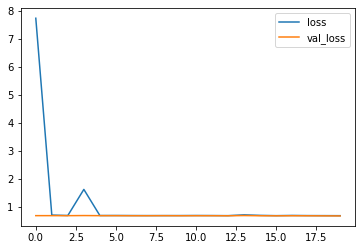

In [45]:
losses[['loss','val_loss']].plot();

In [54]:
from tensorflow.keras.models import load_model

In [55]:
model=load_model(r"C:\Users\dell\Documents\Perso\Deep_Learning_TF_2_Notebooks_et_Datasets\04-CNNs\malaria_detector.h5")

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [57]:
model.evaluate(test_image_gen)

163/163 [==============================] - 14s 84ms/step - loss: 0.1745 - accuracy: 0.94920s - loss: 0.1738 


[0.17447884380817413, 0.9492307901382446]

In [58]:
pred=model.predict(test_image_gen)

In [59]:
pred

array([[1.0168980e-04],
       [5.6326866e-05],
       [2.8761431e-05],
       ...,
       [9.6309769e-01],
       [9.7298074e-01],
       [9.7605228e-01]], dtype=float32)

In [66]:
predictions=pred>0.8

In [68]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [71]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1300
           1       0.95      0.93      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [72]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1238,   62],
       [  89, 1211]], dtype=int64)